In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

In [5]:
def assign_color(x):
    if x == "conserved":
        return "#EAC435"
    elif x == "random_denovo":
        return "#A44328"
    elif x == "random_conserved":
        return "blue"
    else:
        return "#43978D"
    
def assign_class(x):
    if "droso" in x:
        return "denovo"
    elif "rand" in x:
        return "random_denovo"
    elif "rnd" in x:
        return "random_conserved"
    else:
        return "conserved"

In [6]:
dn = pd.read_csv("de_novo_proteins_data.csv", index_col=0)

cons = pd.read_csv("established_proteins_data.csv", index_col=0)
cons = cons[cons["isDeNovo"] == False]

rnd = pd.read_csv("random_sequences_data.csv", index_col=0)


In [7]:
df = pd.read_csv("ESM2_650M_Embeddings.csv", index_col=False) #Needs to be downloaded from Zenodo first!
df["class"] = df["id"].apply(lambda x: assign_class(x))
#df = df[df["class"] != "random_conserved"]
df["color"] = df["class"].apply(lambda x: assign_color(x))
df_numerical = df.drop(["id", "class", "color"], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'ESM2_650M_Embeddings.csv'

In [ ]:
reduce = umap.UMAP(n_neighbors=15, random_state=42, metric="manhattan", n_epochs=5000)
embedding = reduce.fit_transform(df_numerical)
embedding_df = pd.DataFrame(embedding, columns=["x", "y"])
embedding_df["id"] = df["id"]
embedding_df["class"] = df["class"]
embedding_df["color"] = df["color"]

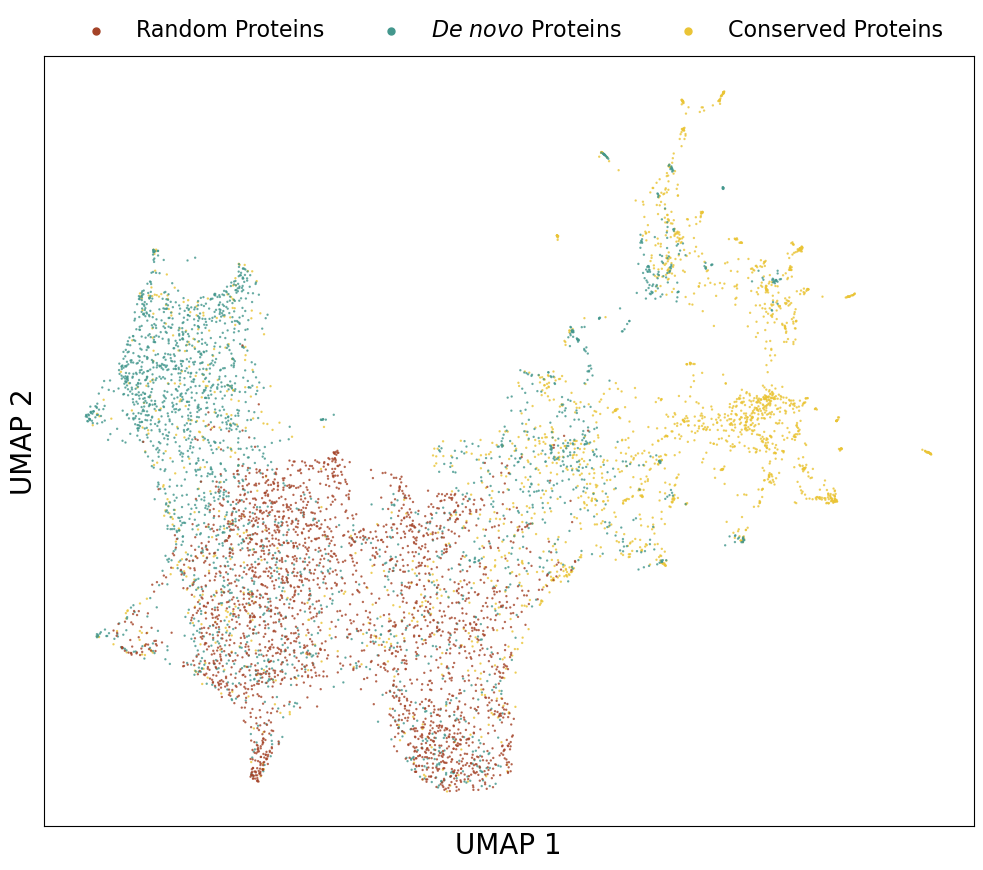

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(embedding_df["x"], embedding_df["y"], c=embedding_df["color"], s=0.5, alpha=0.75)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("UMAP 1", fontsize=20)
ax.set_ylabel("UMAP 2", fontsize=20)

ax.scatter([], [], c="#A44328", label="Random Proteins", s=25)
ax.scatter([], [], c="#43978D", label=r"$\it{De}$ $\it{novo}$ Proteins", s=25)
ax.scatter([], [], c="#EAC435", label="Conserved Proteins", s=25)
ax.scatter([], [], c="blue", label="Random_conserved", s=25)

ax.legend(fontsize=16, bbox_to_anchor=(0.5, 1.075), loc="upper center", ncol=3, frameon=False)
#plt.savefig("UMAP_650M.png", dpi=600, bbox_inches="tight")